# Import libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


# Data preprocessing and analysis

In [5]:
df=pd.read_csv('penguins_raw.csv')

In [7]:
df.shape

(344, 18)

In [8]:
df.head()

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,1,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,2,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,3,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,4,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,5,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           344 non-null    int64  
 1   studyName            344 non-null    object 
 2   Sample Number        344 non-null    int64  
 3   Species              344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Stage                344 non-null    object 
 7   Individual ID        344 non-null    object 
 8   Clutch Completion    344 non-null    object 
 9   Date Egg             344 non-null    object 
 10  Culmen Length (mm)   342 non-null    float64
 11  Culmen Depth (mm)    342 non-null    float64
 12  Flipper Length (mm)  342 non-null    float64
 13  Body Mass (g)        342 non-null    float64
 14  Sex                  333 non-null    object 
 15  Delta 15 N (o/oo)    330 non-null    flo

In [12]:
df.isna().sum()

Unnamed: 0               0
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

In [13]:
df= df.drop('Comments',axis=1)
df=df.dropna()

In [14]:
df.shape

(324, 17)

In [17]:
norm_scaler = MinMaxScaler(feature_range=(0, 1))
norm_scaler.fit(df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']])
df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']] = norm_scaler.transform(df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']])

In [19]:
df.head(5)

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,2,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,0.269091,0.511905,0.237288,0.305556,FEMALE,8.94956,-24.69454
2,3,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,0.298182,0.583333,0.389831,0.152778,FEMALE,8.36821,-25.33302
4,5,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,0.167273,0.738095,0.355932,0.208333,FEMALE,8.76651,-25.32426
5,6,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,0.261818,0.892857,0.305085,0.263889,MALE,8.66496,-25.29805
6,7,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,0.247273,0.559524,0.152542,0.256944,FEMALE,9.18718,-25.21799


In [23]:
print(df['Species'].unique())
print(df['Region'].unique())
print(df['Island'].unique())
print(df['Stage'].unique())

['Adelie Penguin (Pygoscelis adeliae)' 'Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)']
['Anvers']
['Torgersen' 'Biscoe' 'Dream']
['Adult, 1 Egg Stage']


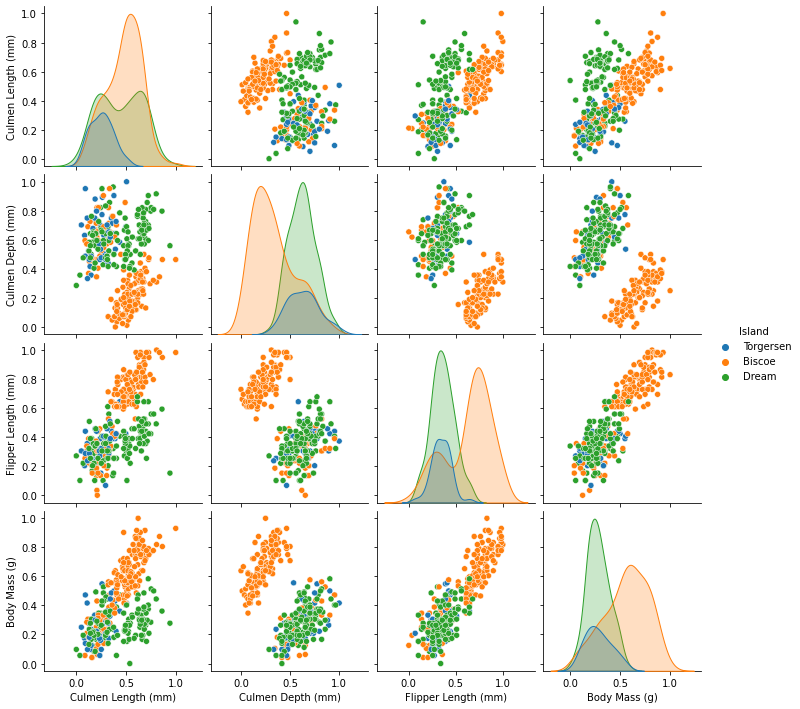

In [26]:
sns.pairplot(df[['Island','Culmen Length (mm)','Culmen Depth (mm)',
                 'Flipper Length (mm)','Body Mass (g)']],hue='Island');

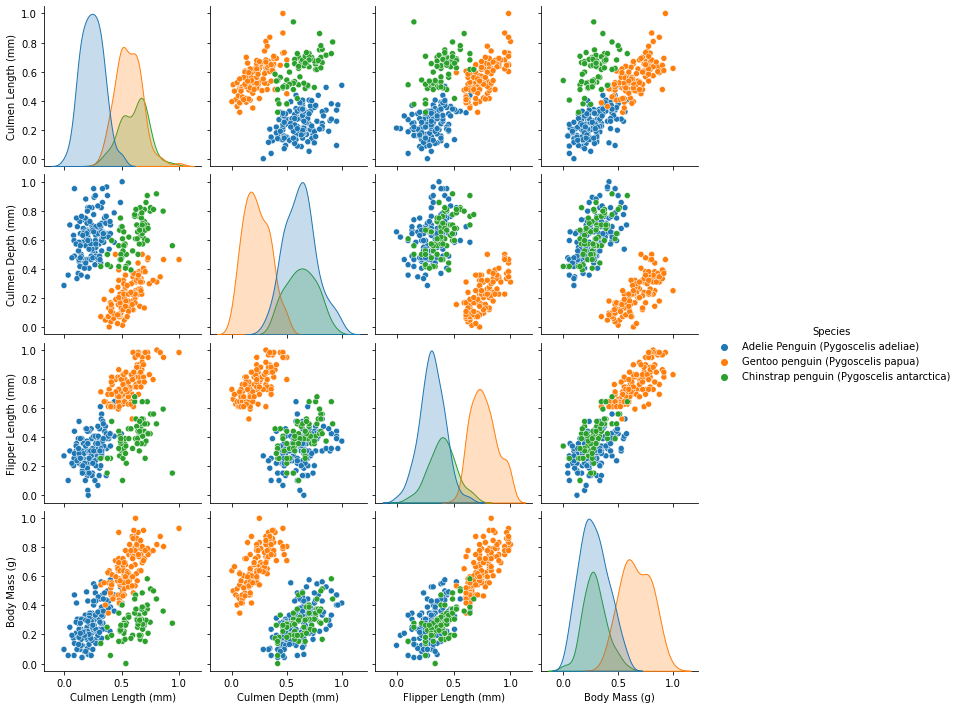

In [27]:
sns.pairplot(df[['Species','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']],hue='Species');

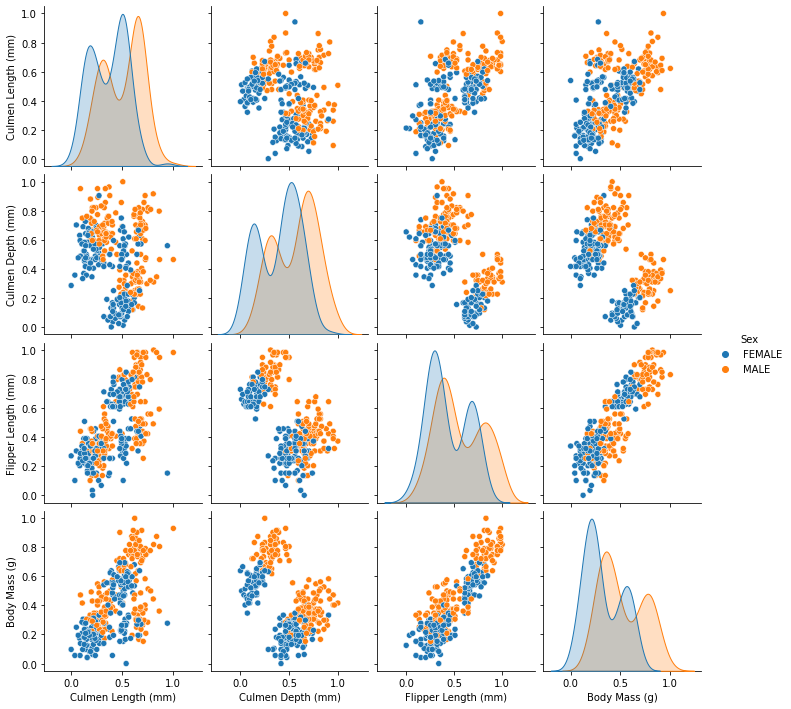

In [28]:
sns.pairplot(df[['Sex','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']],hue='Sex');

# Calculation and visualization of the silhouette coefficient